In [ ]:
from abc import ABC, abstractmethod
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set number of machines
k = 10

In [ ]:
class ArcadeMachine:
  def __init__(self, q_star):
    self.q_star = q_star

  def play(self):
      # Returns a reward sampled around the true value
      return np.random.normal(self.q_star, 1.0)

In [ ]:
class Environment:
  def __init__(self, q_stars):
    self.machines = [ArcadeMachine(q_star) for q_star in q_stars]
    self.num_machines = len(q_stars)

  def play(self, action):
    return self.machines[action].play()

In [ ]:
q_stars = [1.0, 0.5, 2.5, -1.0, 0.0, 1.7, 1.2, 0.4, 0.3, 2.1]
environment = Environment(q_stars)

In [ ]:
class Agent(ABC):
    def __init__(self):
      self.num_machines = environment.num_machines
      self.Q = torch.zeros(self.num_machines)
      self.N = torch.zeros(self.num_machines)
      self.reward_history = [[] for _ in range(self.num_machines)]

    @abstractmethod
    def select_action(self):
        pass

    def update(self, action, reward):
      self.N[action] +=1
      self.Q[action] += (1/ self.N[action]) * (reward - self.Q[action])
      self.reward_history[action].append(reward)

In [ ]:
class EpsilonGreedyAgent(Agent):
  def __init__(self, epsilon):
    super().__init__()
    self.epsilon = epsilon

  def select_action(self):
    if np.random.rand() < self.epsilon:
      # explore
      return np.random.randint(self.num_machines)
    else:
      # exploit
      return torch.argmax(self.Q).item()

In [ ]:
epsilon_greedy_agent = EpsilonGreedyAgent(0.1)

In [ ]:
for step in range(1000):
    action = epsilon_greedy_agent.select_action()
    reward = environment.play(action)
    epsilon_greedy_agent.update(action, reward)

In [ ]:
def plot_violin(data, title="Violin Plot", xlabel="X-Axis", ylabel="Y-Axis"):
  plt.figure(figsize=(10, 6))
  sns.violinplot(data=data)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

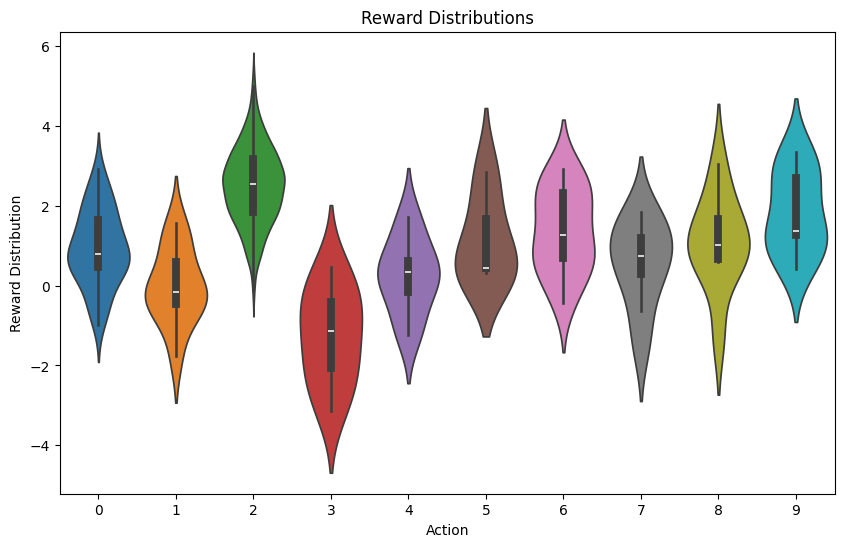

In [ ]:
plot_violin(epsilon_greedy_agent.reward_history, "Reward Distributions", "Action", "Reward Distribution")

In [ ]:
def print_best_action(agent):
    best_action = torch.argmax(agent.Q).item()
    best_value = agent.Q[best_action].item()
    print(f"Best action (arm) estimated: {best_action}")
    print(f"Estimated value Q(a): {best_value:.3f}")

In [ ]:
print_best_action(epsilon_greedy_agent)

Best action (arm) estimated: 2
Estimated value Q(a): 2.507
